In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
visa_df=pd.read_csv(r"C:\Users\rosha\OneDrive\Documents\Data Science\Batch-Jan23\5.Data-Files\Visadataset.csv")
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


**Steps in outliers analysis**

- Step-1: Find Q1 , Q2 and Q3 values
    
    - np.percerntile(column_data,q)
    
- Step-2: Calculate IQR
    
    - IQR = Q3 - Q1
    
- Step-3: Calculate boundries - lower and upper
    
    - lb= Q1-1.5/*IQR
    
    - up= Q3+1.5/*IQR

- Step-3: Calculate outliers - lower and upper
    
    - c1= column data <lb
    
    - c2= column data >lb
    
    - condition = c1|c2

In [24]:
q1=np.percentile(visa_df['prevailing_wage'],25)
q2=np.percentile(visa_df['prevailing_wage'],50)
q3=np.percentile(visa_df['prevailing_wage'],75)
print("Q1, Q2, Q3 --->", q1, q2, q3)
iqr=q3-q1
print("IQR --->",iqr)
lb=q1-(iqr*1.5)
ub=q3+(iqr*1.5)
print("Lower bound, Upper bound --->",lb, ub)

c1=visa_df['prevailing_wage']<lb
c2=visa_df['prevailing_wage']>ub

print("Left outliers --->", len(visa_df[c1]))
print("Right outliers --->", len(visa_df[c2]))

outliers_df=visa_df[c1|c2]
print("Total outliers --->", len(outliers_df))

c3=visa_df['prevailing_wage']>=lb
c4=visa_df['prevailing_wage']<=ub
non_outliers_df=visa_df[c3&c4]
print("Total non outliers --->",len(non_outliers_df))

Q1, Q2, Q3 ---> 34015.479999999996 70308.20999999999 107735.51250000001
IQR ---> 73720.03250000002
Lower bound, Upper bound ---> -76564.56875000002 218315.56125000003
Left outliers ---> 0
Right outliers ---> 427
Total outliers ---> 427
Total non outliers ---> 25053


**Compare original data and outliers data**

- will plot histogram and boxplot for bot to compare

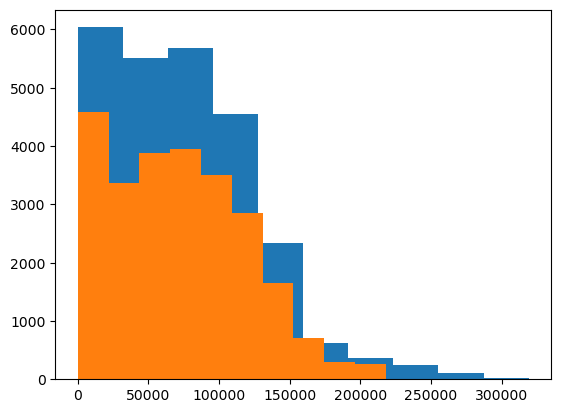

In [26]:
plt.hist(visa_df['prevailing_wage'])
plt.hist(non_outliers_df['prevailing_wage'])
plt.show()

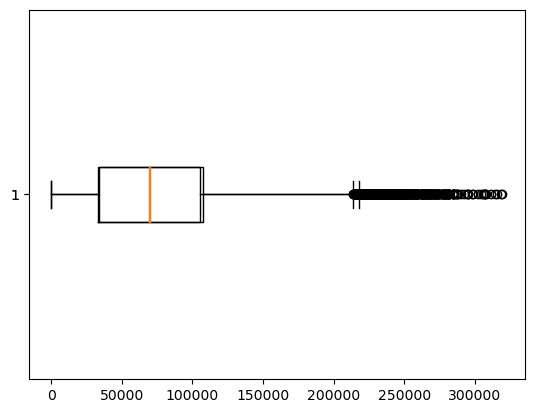

In [28]:
plt.boxplot(visa_df['prevailing_wage'], vert=False)
plt.boxplot(non_outliers_df['prevailing_wage'], vert=False)
plt.show()

$using$-$subplot$

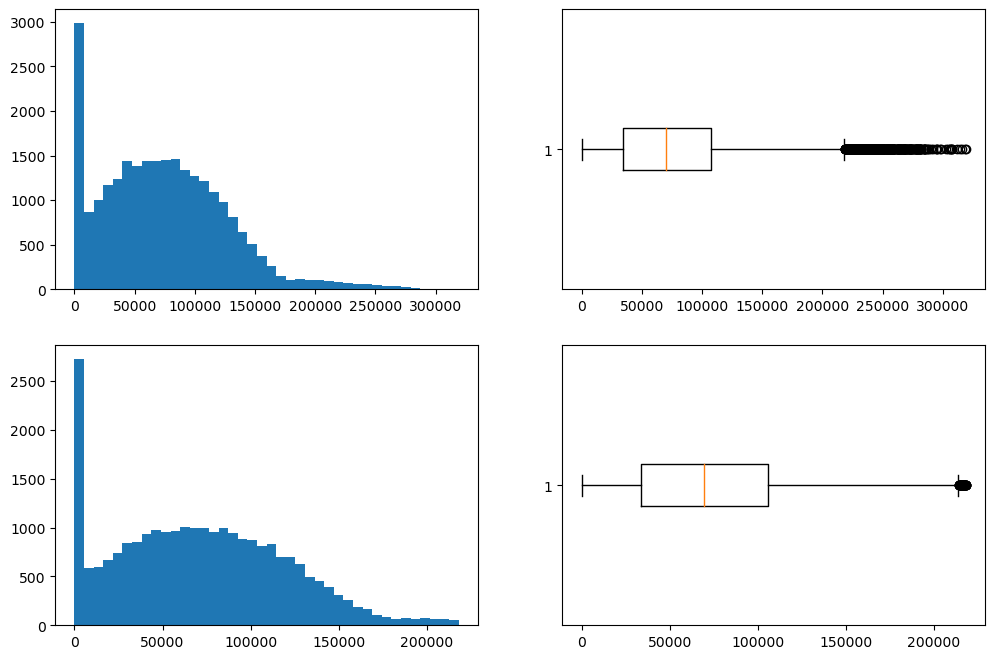

In [41]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.hist(visa_df['prevailing_wage'], bins=40)
plt.subplot(2,2,2)
plt.boxplot(visa_df['prevailing_wage'], vert=False)
plt.subplot(2,2,3)
plt.hist(non_outliers_df['prevailing_wage'], bins=40)
plt.subplot(2,2,4)
plt.boxplot(non_outliers_df['prevailing_wage'], vert=False)
plt.show()

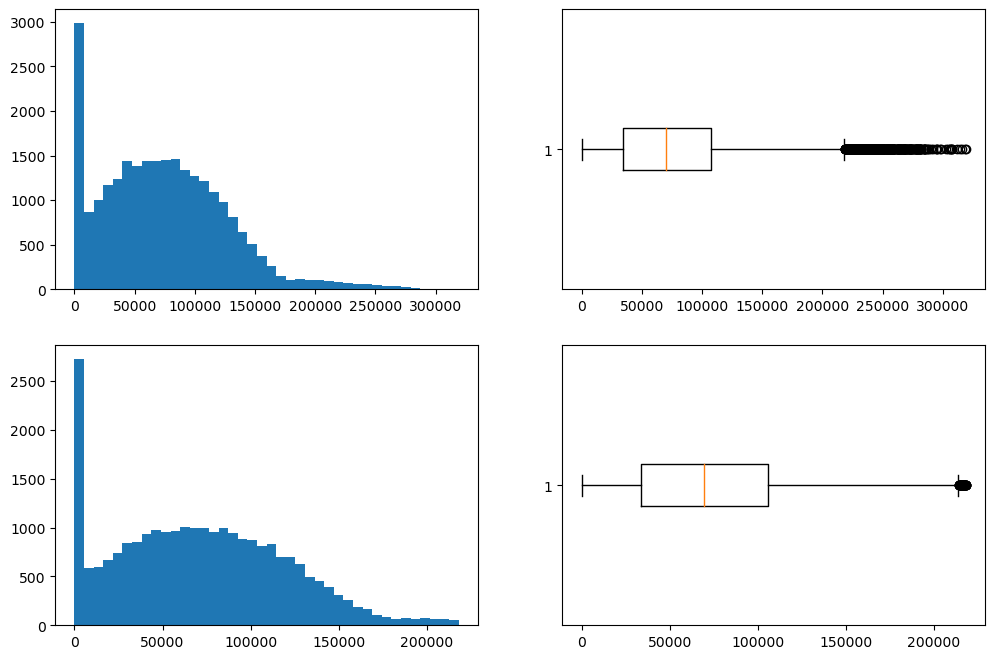

In [42]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1).hist(visa_df['prevailing_wage'], bins=40)
plt.subplot(2,2,2).boxplot(visa_df['prevailing_wage'], vert=False)
plt.subplot(2,2,3).hist(non_outliers_df['prevailing_wage'], bins=40)
plt.subplot(2,2,4).boxplot(non_outliers_df['prevailing_wage'], vert=False)
plt.show()

## How to deal outliers

**Drop the outliers**

    - we can drop the outliers if outlier percentage < 2%
    
    - but this is not recomended as this will result in losing the data for other oclumns as well

**Impute with Median values**

    - as we know median is not affected by outliers
    
    - so it is good practise to impute outliers with median values

**Cap with Q3 or Q1 values**

    - if outliers present with values less than lower bound fill with Q1
    
    - if outliers present with values greater than upper bound fill with Q3

In [3]:
# Task-3 - Read each obervation from prevailing_wage 
# if that obervation <lb or >ub fill with median value


outliers_with_median=[]
median=visa_df['prevailing_wage'].median()
q1=np.percentile(visa_df['prevailing_wage'],25)
q2=np.percentile(visa_df['prevailing_wage'],50)
q3=np.percentile(visa_df['prevailing_wage'],75)
iqr=q3-q1
lb=q1-(iqr*1.5)
ub=q3+(iqr*1.5)
for i in visa_df['prevailing_wage']:
    if i<lb or i>ub:
        outliers_with_median.append(median)
    else:
        outliers_with_median.append(i)

len(outliers_with_median)

outliers_with_median_df=pd.DataFrame(outliers_with_median, columns=['prevailing_wage'])
outliers_with_median_df

visa_df['prevailing_wage_new']=outliers_with_median
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,prevailing_wage_new
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,592.2029
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,83425.6500
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,122996.8600
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,83434.0300
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,149907.3900
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified,77092.5700
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified,70308.2100
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified,146298.8500
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified,86154.7700


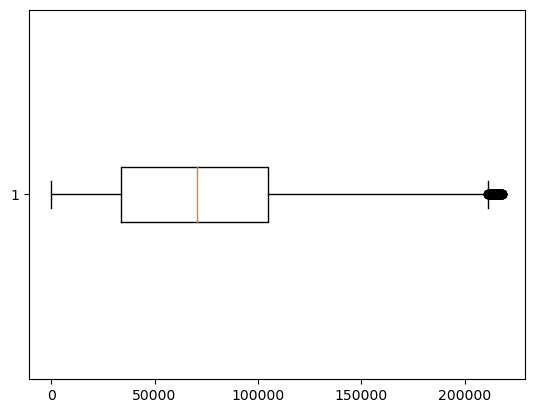

In [4]:
plt.boxplot(visa_df['prevailing_wage_new'], vert=False)
plt.show()
# the prevailing_wage_new boxplot will not have any outliers now

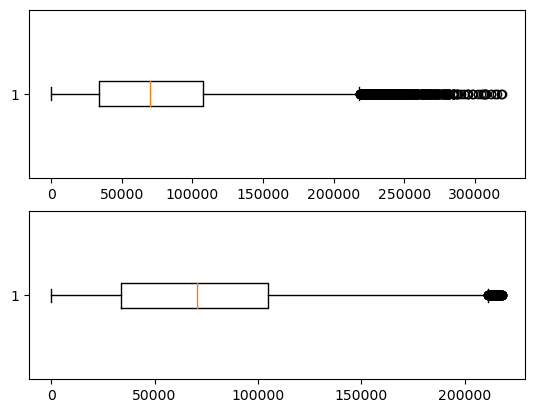

In [12]:
plt.subplot(2,1,1).boxplot(visa_df['prevailing_wage'], vert=False)
plt.subplot(2,1,2).boxplot(visa_df['prevailing_wage_new'], vert=False)
plt.show()

In [13]:
# Reading the fresh data again from file to apply other techinque
visa_df=pd.read_csv(r"C:\Users\rosha\OneDrive\Documents\Data Science\Batch-Jan23\5.Data-Files\Visadataset.csv")
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


- above method we used traditional way with for loop and list 

- same can be done using np.where() method

In [15]:
dict1={'Name':['A', 'B', 'C', 'D'], 'Num':[1,  2, 3, 4]}
df=pd.DataFrame(dict1)

,Name,Num
0,A,1
1,B,2
2,C,3
3,D,4


In [ ]:
# In above dataframe replace num column values which are greater than 2 with 100 other keep the same

In [16]:
# Method-1 : Traditional approach
dict1={'Name':['A', 'B', 'C', 'D'], 'Num':[1,  2, 3, 4]}
df=pd.DataFrame(dict1)
list_new=[]
for i in df['Num']:
    if i>2:
        list_new.append(100)
    else:
        list_new.append(i)
df['Num']=list_new
df

,Name,Num
0,A,1
1,B,2
2,C,100
3,D,100


$np.where()$

    - it takes 3 arguments 
    
    - 1st condition 
    
        - df['Num']>2
    
    - 2nd the True value
    
        - 100
        
    - 3rd the False value 
    
        -df['Num']

In [18]:
# Method-2 : Numpy np.where() approach
dict1={'Name':['A', 'B', 'C', 'D'], 'Num':[1,  2, 3, 4]}
df=pd.DataFrame(dict1)
df_new=np.where(df['Num']>2, 100, df['Num'])
df_new

array([  1,   2, 100, 100], dtype=int64)

In [28]:
# using the np.where replace the outliers in visa_df with median values 

visa_df=pd.read_csv(r"C:\Users\rosha\OneDrive\Documents\Data Science\Batch-Jan23\5.Data-Files\Visadataset.csv")
median=visa_df['prevailing_wage'].median()
q1=np.percentile(visa_df['prevailing_wage'], 25)
q2=np.percentile(visa_df['prevailing_wage'], 50)
q3=np.percentile(visa_df['prevailing_wage'], 75)
iqr=q3-q1
lb=q1-iqr*1.5
up=q3+iqr*1.5
c1=visa_df['prevailing_wage']<lb
c2=visa_df['prevailing_wage']>ub
con=c1|c2
visa_df['prevailing_wage_new']=np.where( con , median, visa_df['prevailing_wage'])
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,prevailing_wage_new
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,592.2029
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,83425.6500
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,122996.8600
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,83434.0300
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,149907.3900
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified,77092.5700
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified,70308.2100
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified,146298.8500
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified,86154.7700


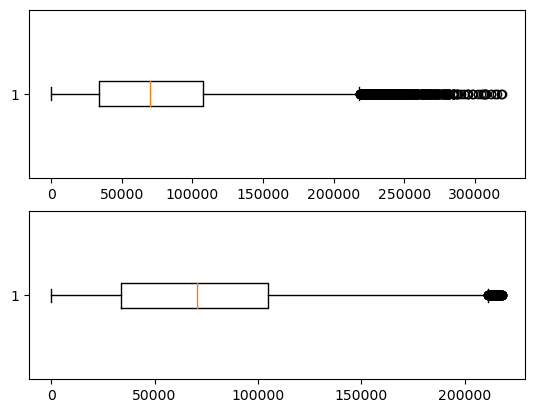

In [29]:
plt.subplot(2,1,1).boxplot(visa_df['prevailing_wage'], vert=False)
plt.subplot(2,1,2).boxplot(visa_df['prevailing_wage_new'], vert=False)
plt.show()